Fourth figure of the manuscript, showing Cross-correlation analyses. 
- Fitting results
- brain maps
- correlations of spatial parameter b with timescales for LFP and gamma

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mnitimescales import plots, utils

plots._set_font_params()

Imports and definitions:

In [3]:
stages = ["W", "N3", "R"]
stage_colors = {"W": "red", "N2": "cyan", "N3": "purple", "R": "green"}
type_colors = {"broadband": "peru", "gamma": "slategrey"}
title_dict = {"W": "Wake", "N2": "NREM2", "N3": "NREM3", "R": "REM"}
corr_type = "pearson"

# Paths
data_path = Path("F:\\MNIOpen")
sc_path = data_path.joinpath("Results", "test_sc_broadband")
sc_gamma_path = data_path.joinpath("Results", "test_sc_gamma")
tau_path = data_path.joinpath("Results", "timescales_broadband")
tau_gamma_path = data_path.joinpath("Results", "timescales_gamma")
fig_path = data_path.joinpath("Figures", "Fig_sc")
fig_path.mkdir(exist_ok=True, parents=True)

# Dataframe with data on SC
df_sc_bb = {
    stage: pd.read_csv(sc_path.joinpath(f"sc_{stage}.csv"), index_col=0)
    for stage in stages
}
df_sc_gamma = {
    stage: pd.read_csv(sc_gamma_path.joinpath(f"sc_{stage}.csv"), index_col=0)
    for stage in stages
}
# Dataframe with the fit parameters on correlation
df_params_corr_bb = {
    stage: pd.read_csv(sc_path.joinpath(f"sc_params_{stage}_fit_corr.csv"), index_col=0)
    for stage in stages
}
df_params_corr_gamma = {
    stage: pd.read_csv(sc_gamma_path.joinpath(f"sc_params_{stage}_fit_corr.csv"), index_col=0)
    for stage in stages
}

# Dataframe with timescales for all electrodes
df_timescales_bb = pd.read_csv(tau_path.joinpath("tau_stages.csv"), index_col=0)
df_timescales_gamma = pd.read_csv(tau_gamma_path.joinpath("tau_stages.csv"), index_col=0)

# MAp of coordinates of MNI atlas
map_coords = pd.read_csv(
    data_path.joinpath("Data", "Parcellation", "mnia_centroids_coords.csv"), index_col=0
)

### A) Plot Correlation vs distance plots 

Broadband:

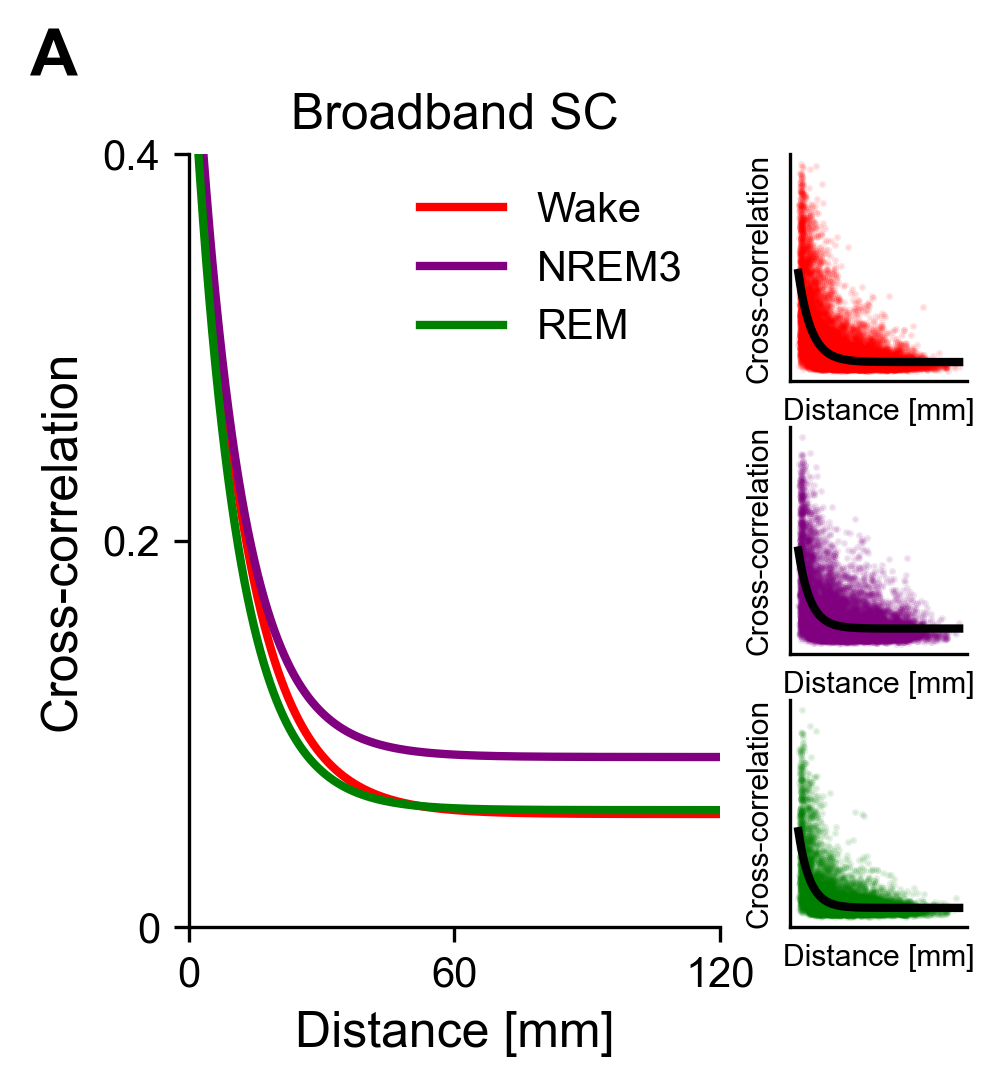

In [4]:
params_stages = {
    stage: par.loc["all"].to_numpy().squeeze()
    for stage, par in df_params_corr_bb.items()
}

fig, axs = plots.plot_sc_fit(
    df_sc_bb,
    params_stages,
    stage_colors,
    dict_stages=title_dict,
    figsize=(8.5, 8.5),
)

# Adjust plot
axs[0].set_xlim(0, 120)
axs[0].set_ylim(0, 0.4)
axs[0].set_xticks([0, 60, 120], labels=[0, 60, 120], fontsize=plots.fsize.TICK_SIZE)
axs[0].set_yticks([0, 0.2, 0.4], labels=[0, 0.2, 0.4], fontsize=plots.fsize.TICK_SIZE)
axs[0].set_title("Broadband SC", fontsize=plots.fsize.TITLE_SIZE)

# Annotate panel
axs[0].text(-0.3, 1.1, "A", transform=axs[0].transAxes, 
            size=16, weight='bold')

plots.save_figure(fig, fig_path.joinpath("Fit_corr_broadband.svg"))
plt.show()

Gamma:

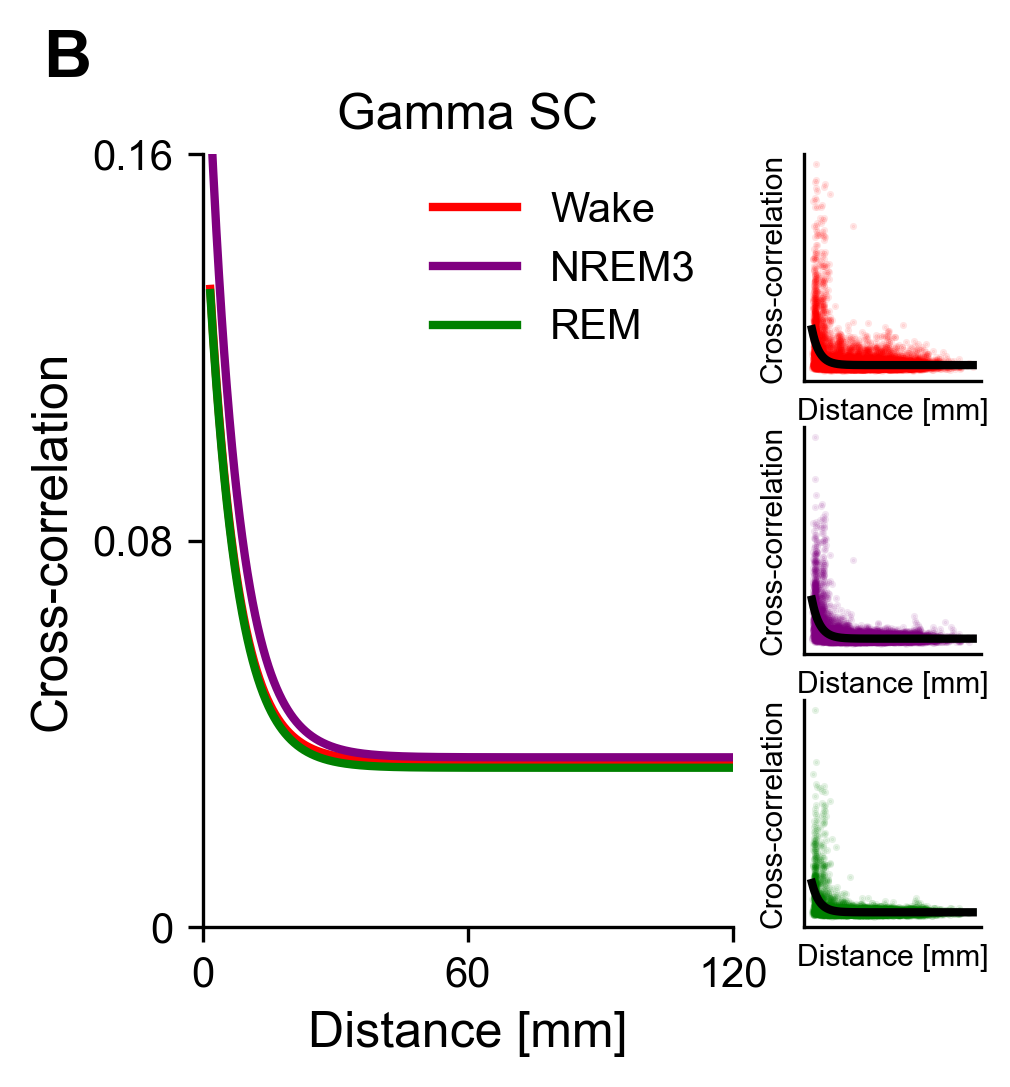

In [5]:
params_stages = {
    stage: par.loc["all"].to_numpy().squeeze() for stage, par in df_params_corr_gamma.items()
}

fig, axs = plots.plot_sc_fit(
    df_sc_gamma,
    params_stages,
    stage_colors,
    dict_stages=title_dict,
    figsize=(8.5, 8.5),
)

axs[0].set_xlim(0, 120)
axs[0].set_ylim(0, 0.16)
axs[0].set_xticks([0, 60, 120], labels=[0, 60, 120], fontsize=plots.fsize.TICK_SIZE)
axs[0].set_yticks([0, 0.08, 0.16], labels=[0, 0.08, 0.16], fontsize=plots.fsize.TICK_SIZE)
axs[0].set_title("Gamma SC", fontsize=plots.fsize.TITLE_SIZE)

# Annotate panel
axs[0].text(-0.3, 1.1, "B", transform=axs[0].transAxes, 
            size=16, weight='bold')

plots.save_figure(fig, fig_path.joinpath("Fit_corr_gamma.svg"))
plt.show()

### B) Correlations of TC / SC

In [6]:
# Parameters for averaging CC over distances
delta_d = 10
distances = np.arange(delta_d, 121, delta_d)

In [7]:
print("Computing for Broadband...")
df_rhos_d_bb = utils.get_tc_sc_corr(df_sc_bb, df_timescales_bb, stages, distances, map_coords, corr_type=corr_type)
print("Computing for gamma...")
df_rhos_d_gamma = utils.get_tc_sc_corr(df_sc_gamma, df_timescales_gamma, stages, distances, map_coords, corr_type=corr_type)

Computing for Broadband...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 10

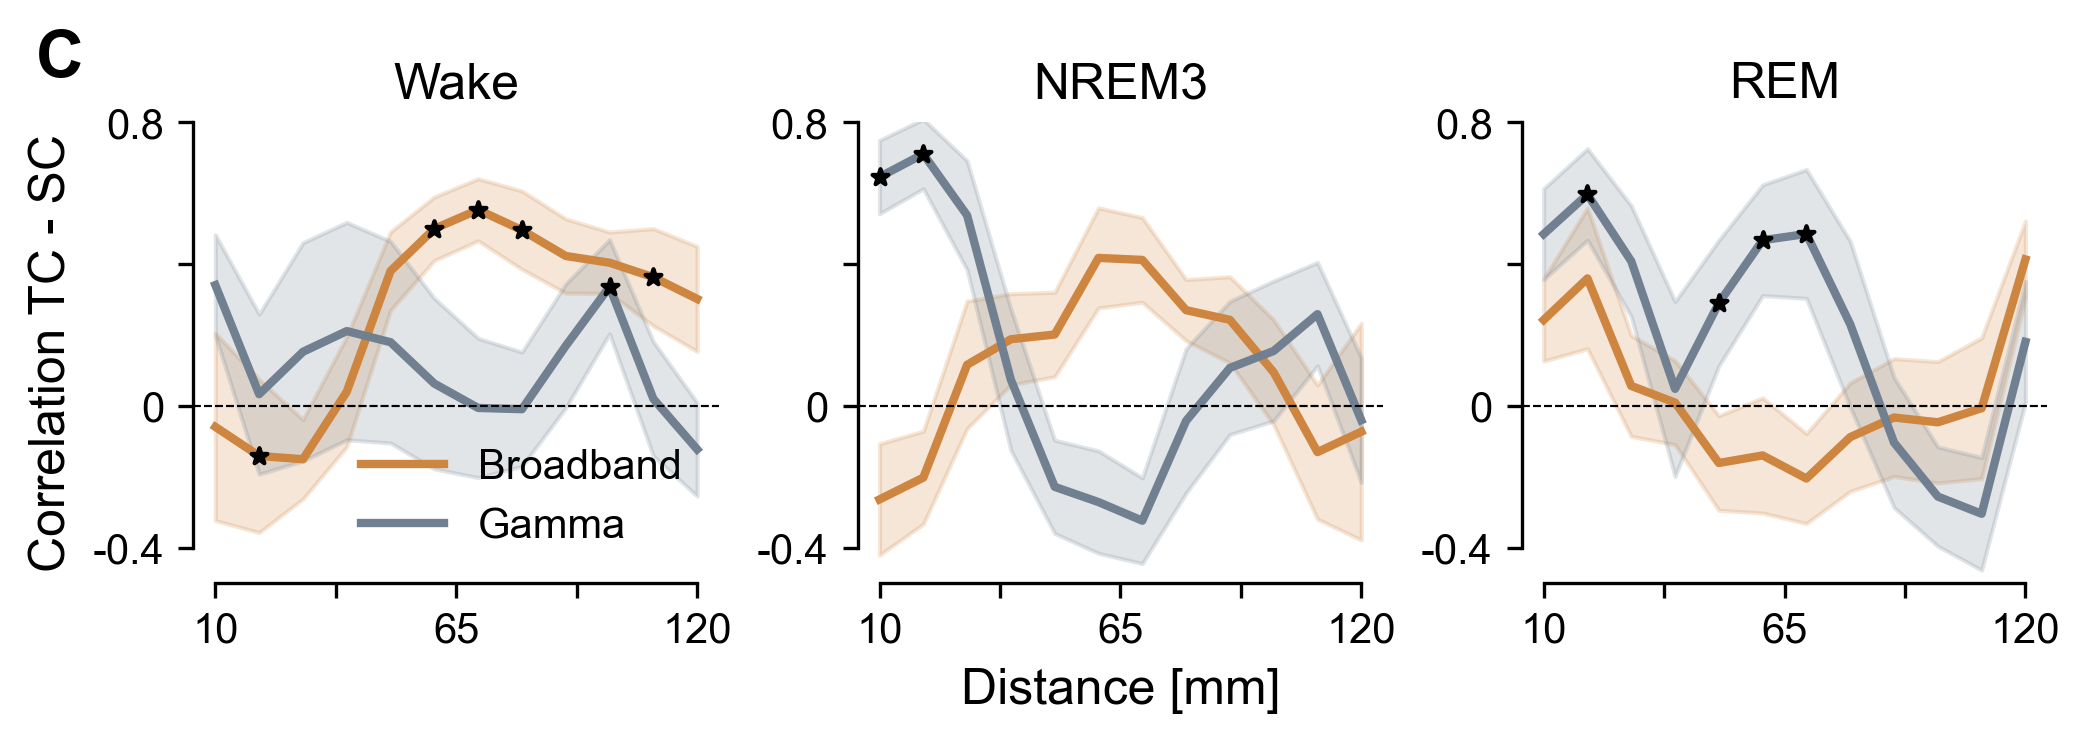

In [10]:
fig, axs = plt.subplots(1, 3, figsize=plots._get_figsize_inches((17.4, 6)), dpi=300, layout="constrained")

for i, stage in enumerate(stages):
    # Plot for broadband
    plots.plot_tc_sc_corr(
        axs[i], 
        df_rhos_d_bb[stage], 
        color=type_colors["broadband"], 
        color_stars="k", 
        label="Broadband"
    )
    # Plot for gamma
    plots.plot_tc_sc_corr(
        axs[i], 
        df_rhos_d_gamma[stage], 
        color=type_colors["gamma"], 
        color_stars="k", 
        title=title_dict[stage],
        ylims=(-0.5, 0.8),
        xlabel="", #"Distance [mm]",
        ylabel="", #"Correlation TC - SC",
        label="Gamma"
    )

    axs[i].set_yticks(
    [-0.4, 0, 0.4, 0.8], labels=[-0.4, 0, "", 0.8], fontsize=plots.fsize.TICK_SIZE
    )
    axs[i].set_xticks(
        np.arange(10, 121, 27.5), labels=[10, "", 65, "", 120], fontsize=plots.fsize.TICK_SIZE
    )
    plots._format_spines(axs[i], s_bounds={"left": (-0.4, 0.8), "bottom": (10, 120)})

# Plot customization
axs[0].set_ylabel("Correlation TC - SC", fontsize=plots.fsize.LABEL_SIZE)
axs[0].legend(frameon=False, fontsize=plots.fsize.TEXT_SIZE)
axs[1].set_xlabel("Distance [mm]", fontsize=plots.fsize.LABEL_SIZE)

# Annotate panel
axs[0].text(-0.3, 1.1, "C", transform=axs[0].transAxes, 
            size=16, weight='bold')

plots.save_figure(fig, fig_path.joinpath(f"corr_tc_sc.svg"))
plt.show()